In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv('/content/car data.csv')


In [89]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [90]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [91]:
df.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual      0  
2         Dealer       Manual      0  
3         Dealer       Manual      0  
4         Dealer       Manual      0  
..           ...          ...    ...  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  

[301 rows x 9 columns]>

In [92]:
df.duplicated().sum()

2

In [93]:
df.drop_duplicates(inplace=True)

In [94]:
df.duplicated().sum()

0

In [95]:
df.shape

(299, 9)

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.566332,0.32,1.20,6.10,9.84,92.6
Driven_kms,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


In [97]:
num_sum = df.describe().T
palette = sns.color_palette('inferno', as_cmap=True)
num_sum.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Year,299.000000,2013.615385,2.896868,2003.000000,2012.000000,2014.000000,2016.000000,2018.000000
Selling_Price,299.000000,4.589632,4.984240,0.100000,0.850000,3.510000,6.000000,35.000000
Present_Price,299.000000,7.541037,8.566332,0.320000,1.200000,6.100000,9.840000,92.600000
Driven_kms,299.000000,36916.752508,39015.170352,500.000000,15000.000000,32000.000000,48883.500000,500000.000000
Owner,299.000000,0.043478,0.248720,0.000000,0.000000,0.000000,0.000000,3.000000


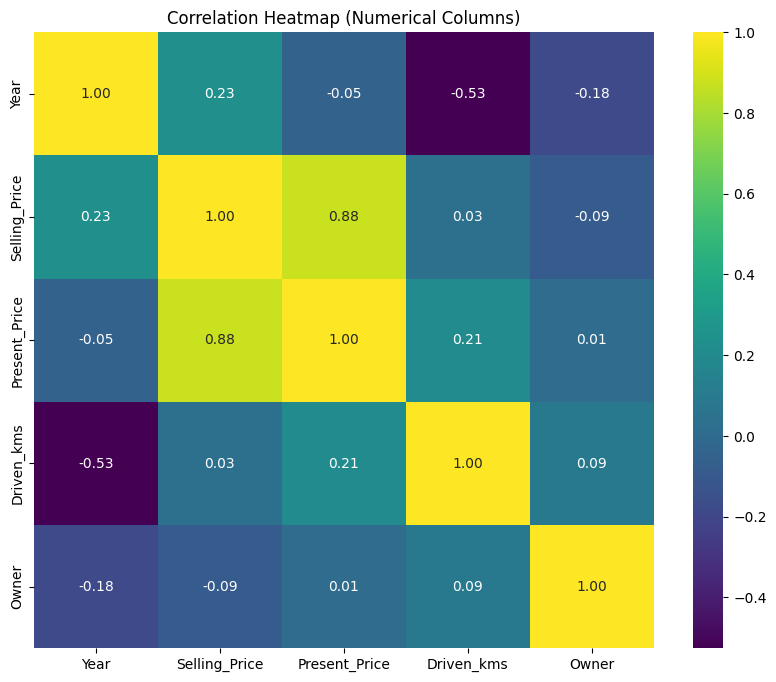

In [98]:
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

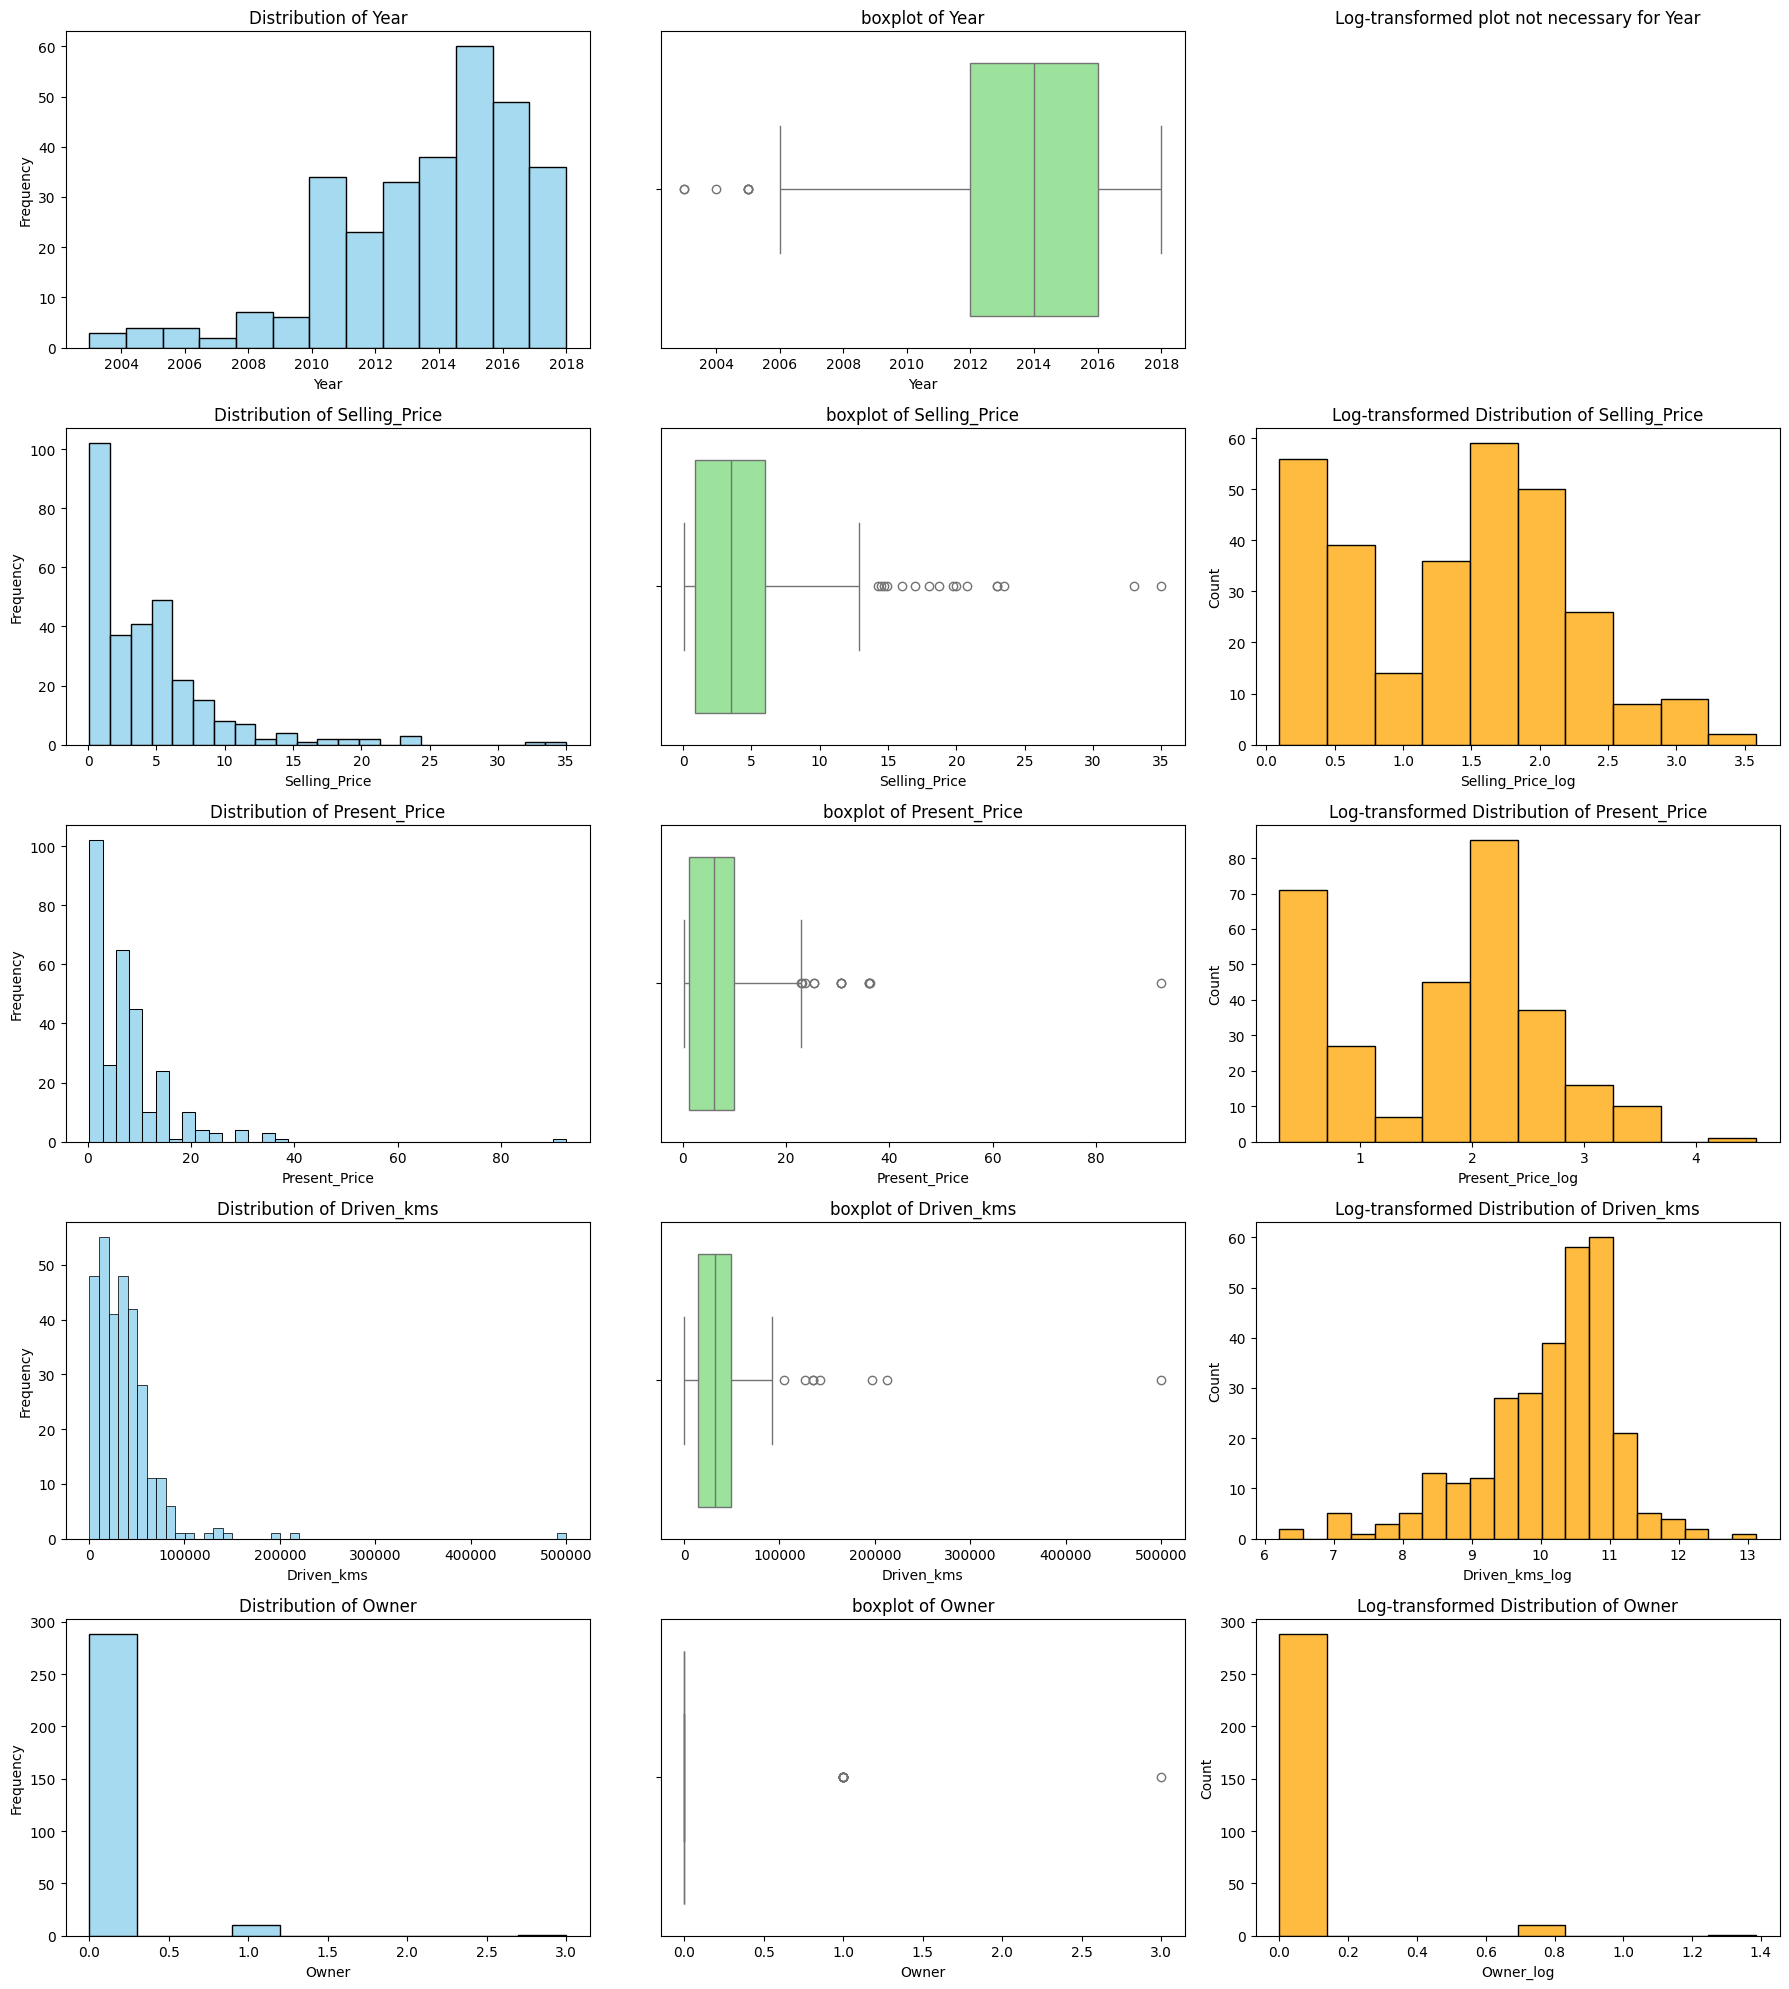

In [99]:
numerical_columns = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(len(numerical_columns), 3, figsize=(18, 4*len(numerical_columns)))

for i, column in enumerate(numerical_columns):
    ax1, ax2, ax3 = axes[i]

    sns.histplot(df[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')

    sns.boxplot(x=df[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'boxplot of {column}')

    if df[column].skew() > 1:
        df[column+'_log'] = np.log1p(df[column])
        sns.histplot(df[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')
plt.tight_layout()
plt.show()

In [100]:
def scatter_plots(df, numerical_columns):
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(16,16))
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                sns.scatterplot(ax=axes[i,j], x=df[numerical_columns[i]], y=df[numerical_columns[j]])
                axes[i,j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
                axes[i,j].set_xlabel(numerical_columns[i])
                axes[i,j].set_ylabel(numerical_columns[j])
            else:
                axes[i,j].axis('off')
    plt.tight_layout()
    plt.show()


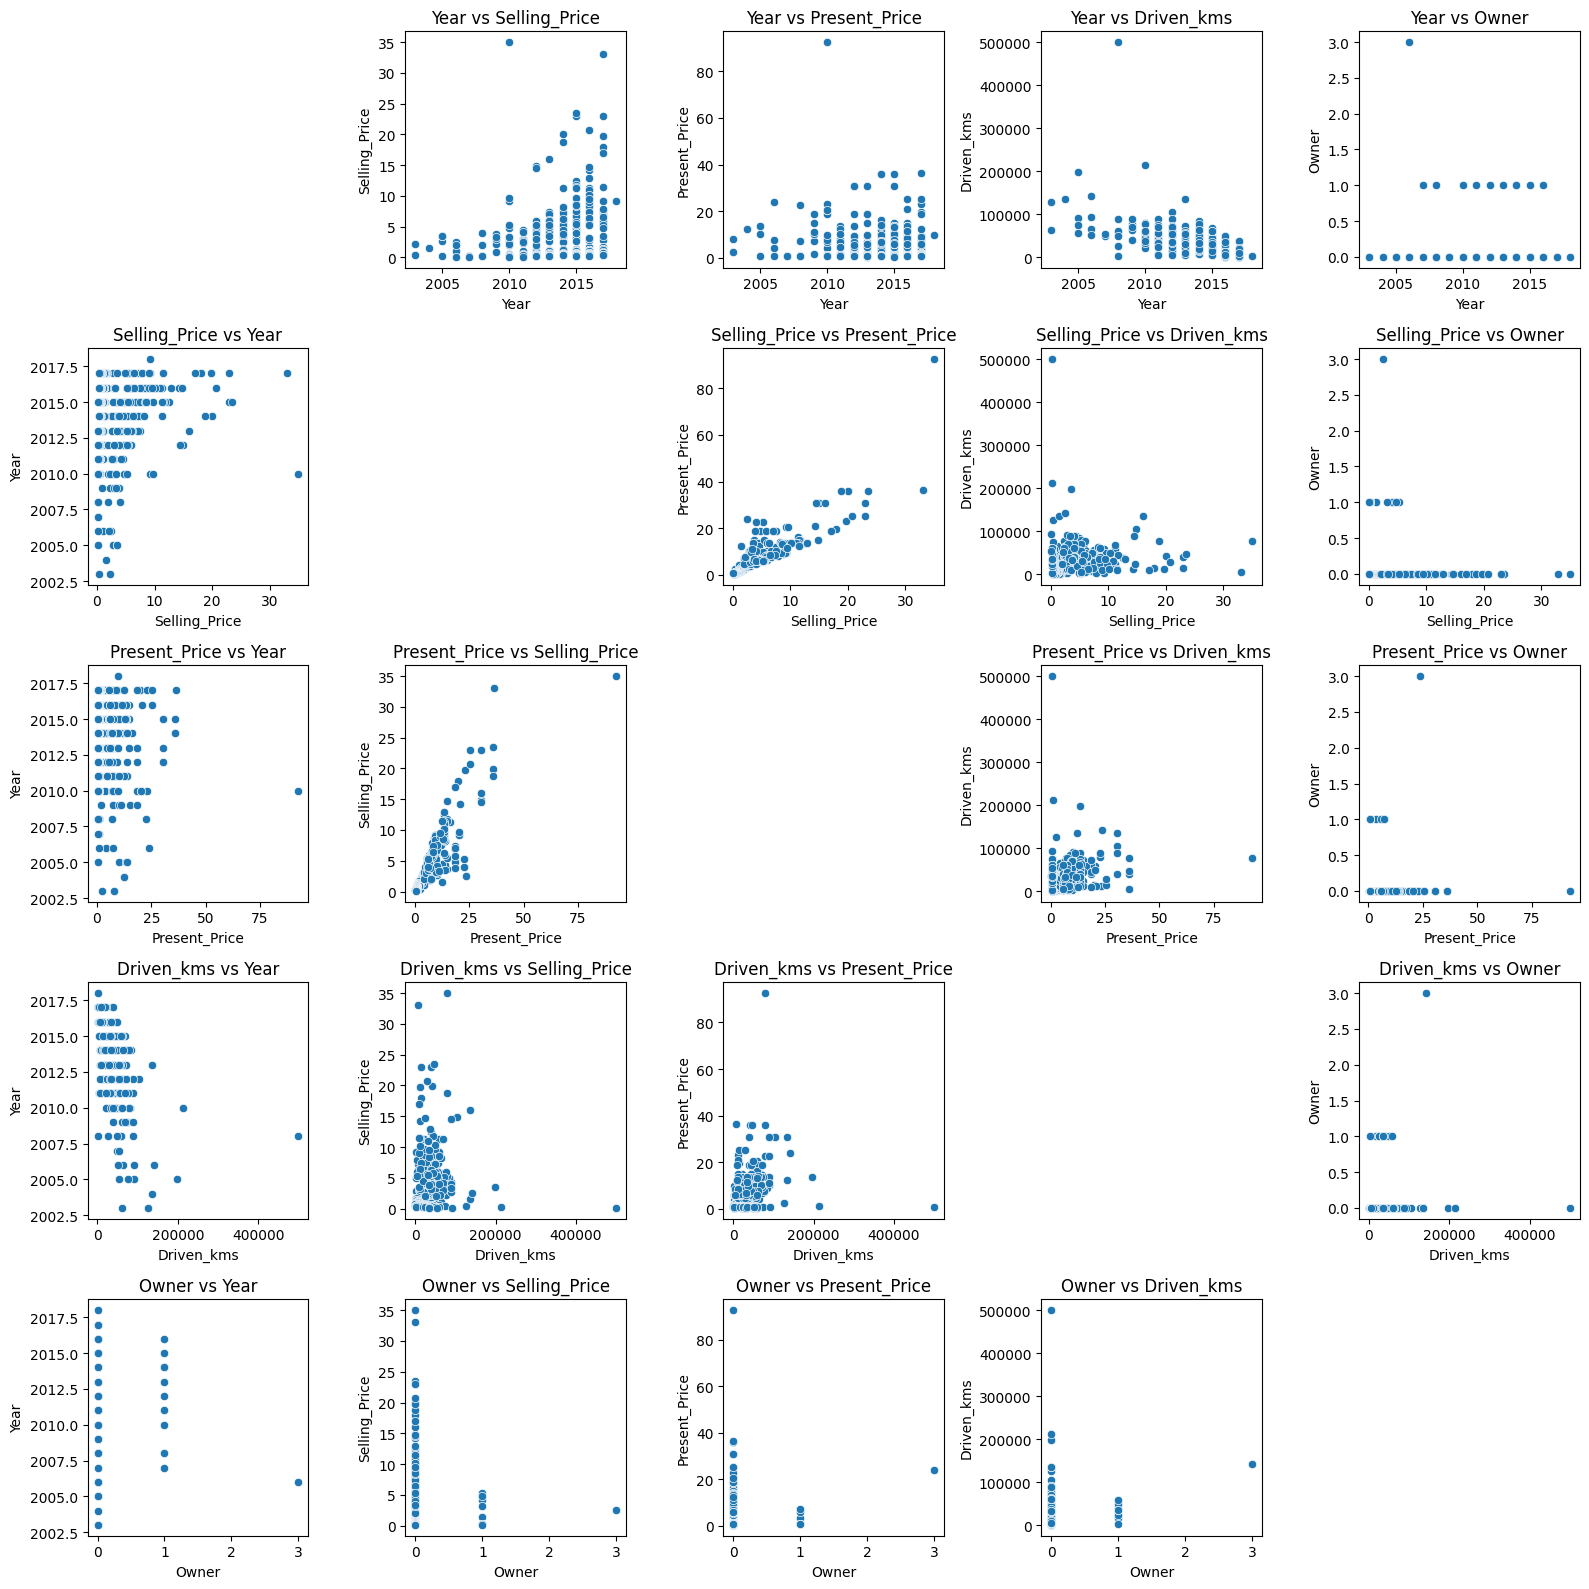

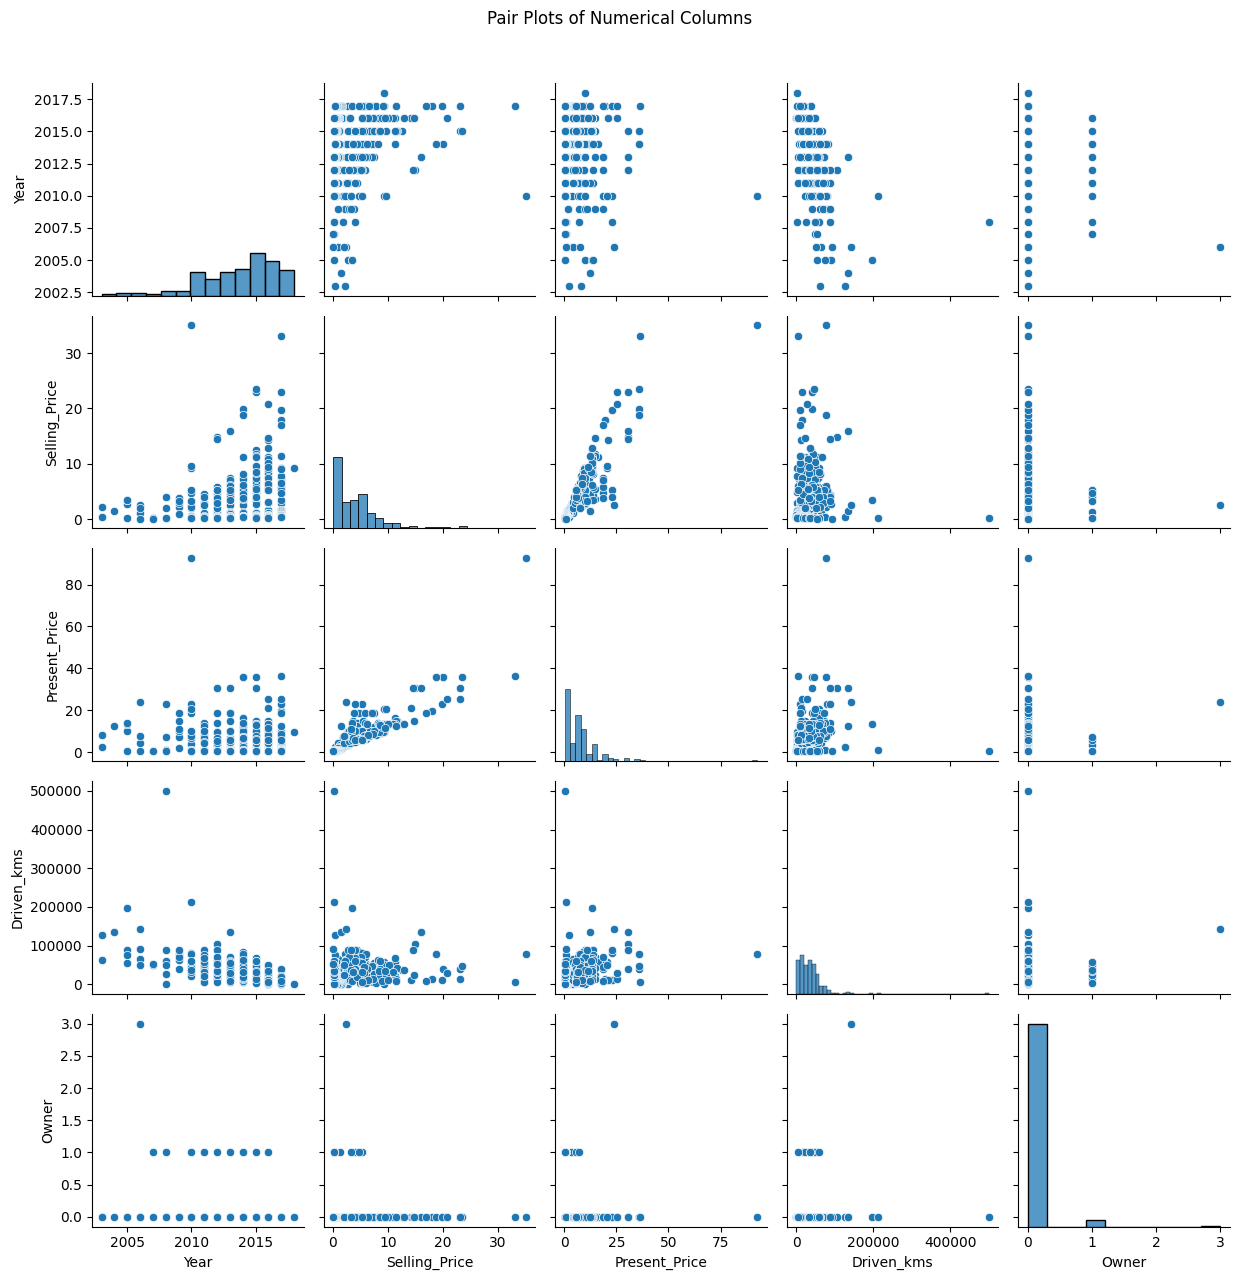

In [101]:
def pair_plots(df, numerical_columns):
    pair_plot=sns.pairplot(df[numerical_columns])
    pair_plot.fig.suptitle('Pair Plots of Numerical Columns', y=1.02)
    plt.tight_layout()
    plt.show()

scatter_plots(df, numerical_columns)
pair_plots(df, numerical_columns)

In [102]:
df.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Fuel_Type,object
Selling_type,object
Transmission,object
Owner,int64
Selling_Price_log,float64


In [103]:
drop_cols=['Car_Name']
df.drop(drop_cols, inplace=True,axis=1)
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,Fuel_Type,Selling_type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [104]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique Values in '{column}':")
    print(unique_values)
    print()

Unique Values in 'Fuel_Type':
['Petrol' 'Diesel' 'CNG']

Unique Values in 'Selling_type':
['Dealer' 'Individual']

Unique Values in 'Transmission':
['Manual' 'Automatic']



In [105]:
dfx = pd.get_dummies(df, columns = object_columns)
dfx.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,1.470176,1.885553,10.203629,0.0,False,False,True,True,False,False,True
1,2013,4.75,9.54,43000,0,1.749200,2.355178,10.668979,0.0,False,True,False,True,False,False,True
2,2017,7.25,9.85,6900,0,2.110213,2.384165,8.839422,0.0,False,False,True,True,False,False,True
3,2011,2.85,4.15,5200,0,1.348073,1.638997,8.556606,0.0,False,False,True,True,False,False,True
4,2014,4.60,6.87,42450,0,1.722767,2.063058,10.656106,0.0,False,True,False,True,False,False,True


In [106]:
dfx.shape

(299, 16)

In [107]:
y = dfx['Selling_Price']
X = dfx.drop(['Selling_Price'], axis=1)

In [108]:
def correlation_analysis(dfx, target):
    correlations = dfx.corr()[target].drop(target)
    top_features = correlations.abs().sort_values(ascending=False).index.tolist()
    return top_features, correlations

def mutual_information(dfx, target):
    y = dfx[target]
    X = dfx.drop(columns=[target])
    mi = mutual_info_regression(X, y)
    mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    return mi_series.index.tolist(), mi_series

def lasso_feature_selection(dfx, target):
    y = dfx[target]
    X = dfx.drop(columns=[target])
    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X, y)
    coef = pd.Series(lasso.coef_, index=X.columns)
    top_features = coef[coef != 0].index.tolist()
    return top_features, coef

Top Features Based on Correlation: ['Selling_Price_log', 'Present_Price', 'Present_Price_log', 'Selling_type_Dealer', 'Selling_type_Individual', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Year', 'Driven_kms_log', 'Owner_log', 'Owner', 'Driven_kms', 'Fuel_Type_CNG']
Top Features Based on Mutual Information: ['Selling_Price_log', 'Present_Price_log', 'Present_Price', 'Selling_type_Dealer', 'Selling_type_Individual', 'Year', 'Fuel_Type_Diesel', 'Driven_kms', 'Fuel_Type_Petrol', 'Driven_kms_log', 'Transmission_Automatic', 'Transmission_Manual', 'Owner', 'Fuel_Type_CNG', 'Owner_log']
Top Features Based on Lasso Regression: ['Present_Price', 'Driven_kms']


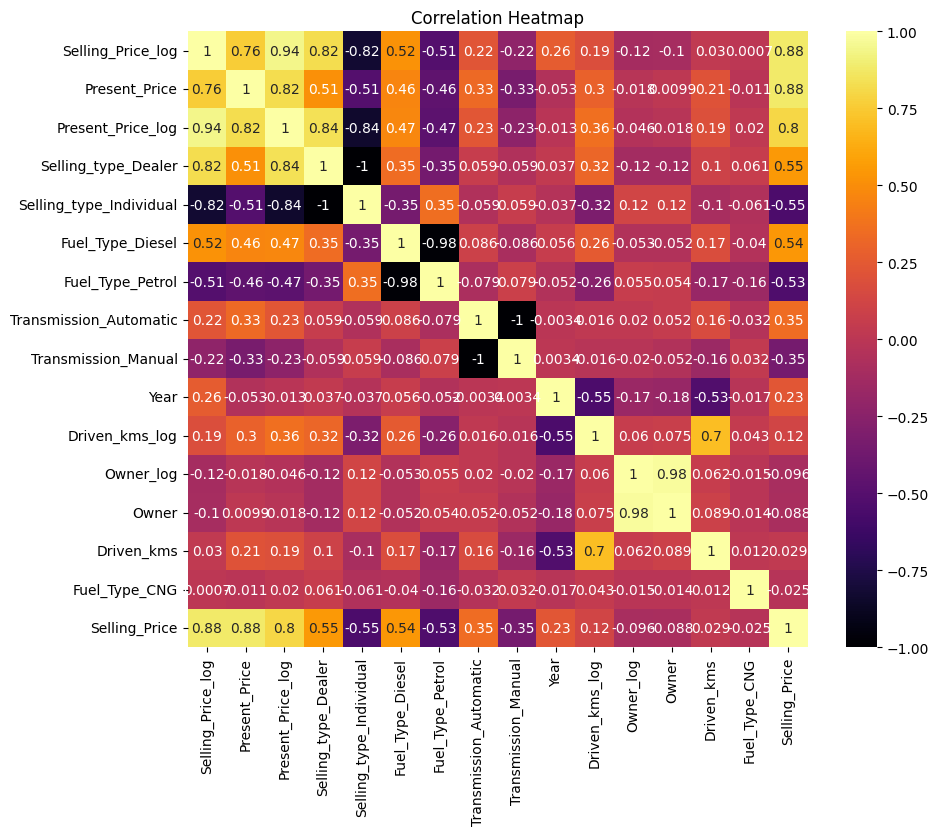

In [109]:
def plot_correlation_heatmap(dfx, top_features, target):
    plt.figure(figsize=(10, 8))
    correlation_matrix = dfx[top_features + [target]].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='inferno', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

# Target column
target = 'Selling_Price'

# Perform analysis
top_features_corr, correlations = correlation_analysis(dfx, target)
top_features_mi, mi_series = mutual_information(dfx, target)
top_features_lasso, coef_ = lasso_feature_selection(dfx, target)

# Print results
print('Top Features Based on Correlation:', top_features_corr)
print('Top Features Based on Mutual Information:', top_features_mi)
print('Top Features Based on Lasso Regression:', top_features_lasso)
plot_correlation_heatmap(dfx, top_features_corr, target)

In [110]:
non_boolean_numerical_features = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'Selling_Price_log', 'Present_Price_log', 'Driven_kms_log', 'Owner_log']
scaler = MinMaxScaler()
dfx[non_boolean_numerical_features] = scaler.fit_transform(dfx[non_boolean_numerical_features])

In [111]:
dfx

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,0.733333,0.093123,0.057109,0.053053,0.0,0.394147,0.377323,0.577348,0.0,False,False,True,True,False,False,True
1,0.666667,0.133238,0.099913,0.085085,0.0,0.474137,0.487527,0.644733,0.0,False,True,False,True,False,False,True
2,0.933333,0.204871,0.103273,0.012813,0.0,0.577633,0.494329,0.379801,0.0,False,False,True,True,False,False,True
3,0.533333,0.078797,0.041504,0.009409,0.0,0.359142,0.319464,0.338848,0.0,False,False,True,True,False,False,True
4,0.733333,0.128940,0.070980,0.083984,0.0,0.466559,0.418977,0.642869,0.0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.866667,0.269341,0.122237,0.067043,0.0,0.646769,0.529419,0.610677,0.0,False,True,False,True,False,False,True
297,0.800000,0.111748,0.060468,0.119119,0.0,0.434070,0.388110,0.692974,0.0,False,False,True,True,False,False,True
298,0.400000,0.093123,0.115735,0.175043,0.0,0.394147,0.517970,0.748324,0.0,False,False,True,True,False,False,True
299,0.933333,0.326648,0.131990,0.017017,0.0,0.696753,0.545609,0.418272,0.0,False,True,False,True,False,False,True


In [112]:
TopF=['Selling_Price_log', 'Present_Price', 'Present_Price_log', 'Selling_type_Dealer', 'Selling_type_Individual', 'Year', 'Driven_kms', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Driven_kms_log', 'Transmission_Manual', 'Transmission_Automatic', 'Owner', 'Fuel_Type_CNG', 'Owner_log']
x=dfx[TopF]

In [113]:
def remove_redundant_features(df, threshold = 0.87):
    corr_matrix = df.corr().abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
    to_drop = [column for column in upper_triangle_matrix.columns if any(upper_triangle_matrix[column] > threshold)]
    df_reduced = df.drop(columns=to_drop)

    return df_reduced, to_drop
threshold=0.87
x, dropped_features = remove_redundant_features(x, threshold)

print('Dropped Features:', dropped_features)
def remove_redundant_features(df, threshold = 0.87):
    corr_matrix = df.corr().abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
    to_drop = [column for column in upper_triangle_matrix.columns if any(upper_triangle_matrix[column] > threshold)]
    df_reduced = df.drop(columns=to_drop)

    return df_reduced, to_drop
threshold=0.87
x, dropped_features = remove_redundant_features(x, threshold)

print('Dropped Features:', dropped_features)
print('Reduced DataFrame Shape:', x.shape)
# Dropped Features: ['Present_Price_log', 'Selling_type_ ... ] (This is a comment, not code)

Dropped Features: ['Present_Price_log', 'Selling_type_Individual', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Owner_log']
Dropped Features: []
Reduced DataFrame Shape: (299, 10)


In [114]:


x.columns



Index(['Selling_Price_log', 'Present_Price', 'Selling_type_Dealer', 'Year',
       'Driven_kms', 'Fuel_Type_Diesel', 'Driven_kms_log',
       'Transmission_Manual', 'Owner', 'Fuel_Type_CNG'],
      dtype='object')

In [115]:
X=x.drop(['Selling_Price_log', 'Present_Price', 'Selling_type_Dealer','Driven_kms_log','Owner', 'Fuel_Type_CNG'], axis=1)
X

,Year,Driven_kms,Fuel_Type_Diesel,Transmission_Manual
0,0.733333,0.053053,False,True
1,0.666667,0.085085,True,True
2,0.933333,0.012813,False,True
3,0.533333,0.009409,False,True
4,0.733333,0.083984,True,True
...,...,...,...,...
296,0.866667,0.067043,True,True
297,0.800000,0.119119,False,True
298,0.400000,0.175043,False,True
299,0.933333,0.017017,True,True


In [116]:
non_boolean_numerical_features = ['Year','Driven_kms']
scaler = MinMaxScaler()
X[non_boolean_numerical_features] = scaler.fit_transform(X[non_boolean_numerical_features])

In [117]:
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [118]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [119]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [120]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Training R2 Score: {train_r2:.2f}")
print(f"Testing R2 Score: {test_r2:.2f}")

Training MSE: 1.19
Testing MSE: 5.96
Training R2 Score: 0.95
Testing R2 Score: 0.77


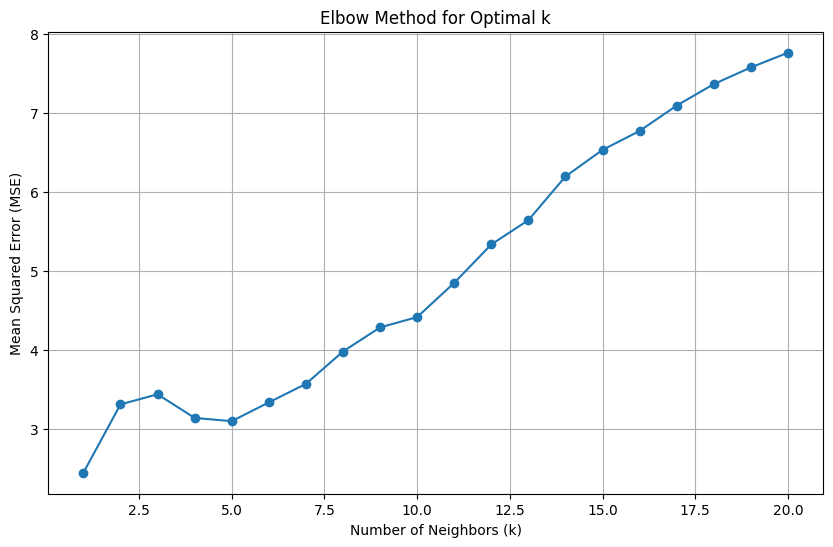

In [121]:
mse_values = []
r2_values = []
max_neighbors = 20
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [122]:
optimal_k = mse_values.index(min(mse_values))+1
print(f"Optimal number of neighbors (k): {optimal_k}")

Optimal number of neighbors (k): 1


In [123]:
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [124]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [125]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0
Testing MSE: 2.44712
Training R2 Score: 1.0
Testing R2 Score: 0.9050519884172814


In [126]:
param_grid = {
    'max_depth': [3,5,7,9],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

dtr = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dtr,
                          param_grid=param_grid,
                          cv=5,
                          verbose=1,
                          n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [127]:
best_params = grid_search.best_params_
print('Best HyperParameters:',best_params)

Best HyperParameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [128]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [129]:
bdtr = DecisionTreeRegressor(**best_params)
bdtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_split=5)

In [130]:
y_pred_train = bdtr.predict(X_train)
y_pred_test = bdtr.predict(X_test)

In [131]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.019918479776847978
Testing MSE: 1.687848194444444
Training R2 Score: 0.9991871632900298
Testing R2 Score: 0.9345116586370992


In [132]:
param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[None, 5, 10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

rf=RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator= rf,
                          param_grid=param_grid,
                          cv=5,
                          verbose=1,
                          n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [133]:
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [134]:
brf = RandomForestRegressor(**best_params)
brf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2)

In [135]:
y_pred_train = brf.predict(X_train)
y_pred_test = brf.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.3896350966460477
Testing MSE: 0.9281139523506703
Training R2 Score: 0.9840997047166803
Testing R2 Score: 0.963989271348412


In [136]:
!pip install --upgrade scikit-learn xgboost

In [137]:
models={
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(random_state=42),
    'Random Forest' : RandomForestRegressor(random_state=42),

}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                     'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,1.193066e+00,5.963397,0.951313,0.768621
1,Decision Tree,1.095927e-34,1.570915,1.000000,0.939049
2,Random Forest,6.761235e-02,0.934460,0.997241,0.963743


In [138]:
results = results_df
palette = sns.color_palette('inferno', as_cmap=True)
results_df.style.background_gradient(cmap=palette)

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,1.193066,5.963397,0.951313,0.768621
1,Decision Tree,0.000000,1.570915,1.000000,0.939049
2,Random Forest,0.067612,0.934460,0.997241,0.963743
